Ejercicio 2. 

Utiliza tu función derivadaNumerica para calcular la derivada de la función $\cos$ en un punto $x_0\in[0,1)$. Compara tu resultado con el que indica el cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$. Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$: $$\epsilon=\left|\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)}\right|,$$ respecto a $h$.

In [6]:
function derivadaNumerica(f,x0,h) #función, punto inicial, incremento 
    derivada=(f(x0+h)-f(x0))/h
    return derivada
    end

derivadaNumerica (generic function with 1 method)

In [2]:
-sin(0.6)

-0.5646424733950354

In [4]:
function f(x)
    cos(x)
    end

f (generic function with 1 method)

In [4]:
derivadaNumerica(f,0.6,0.1)

-0.6049342762518983

In [5]:
derivadaNumerica(f,0.6,0.01)

-0.5687597064198857

In [6]:
derivadaNumerica(f,0.6,0.0001)

-0.5646837392347948

In [1]:
function convergencia(f,x,h)
    list1 = [] #se almacenarás los valores de la derivada
    r = 0.0 
    for i in 1:length(h)
        r = derivadaNumerica(f,x,h[i])
        push!(list1,r)
    end
    xlabel("1/h")
    ylabel("Valor de la derivada numerica")
    title("Convergencia al valor exacto de la derivada")
    plot(fill(-sin(0.6),length(h))) #La asintota del valor exacto
    plot(1/h,list1,"r")
    show()
end

convergencia (generic function with 1 method)

In [ ]:
using PyPlot
converger(f,0.6,linspace(1,0.001,1000))

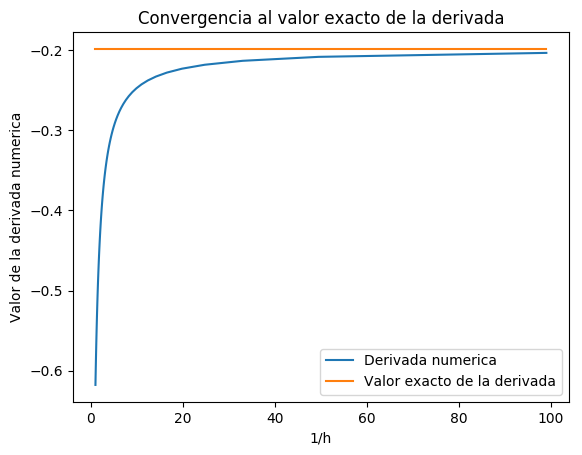

Se puede ver en la gráfica anterior que mientras sea más grande el valor de $\frac{1}{h}$, entonces la derivada va a tender a nuestro valor obtenido en el test de arriba -0.6



In [2]:
function ErrorR(f,x,h,Der)
    E=((derivadaNumerica(f,x,h)/Der)-1)
    return E
    end

ErrorR (generic function with 1 method)

In [7]:
ErrorR(f,0.6,0.001,-sin(0.6))

0.0007306812460319279

In [8]:
function ERelativo(f,x,h,Der)
    list2=[] #en esta lista se van a guardar los errores 
    Error=0.0
    for i in 1:length(h) #depende del número de h, que solicitemos
        Error=ERelativo(f,x,h[i],Der)
        push!(list2,Error) 
    end
    xlabel("h"),ylabel("Error relativo"),title("")
    plot(h,list2)
    show()
    end

ERelativo (generic function with 1 method)

In [ ]:
ERelativo(f,0.6,linspace(1,0.001,1000),sin(-0.6))

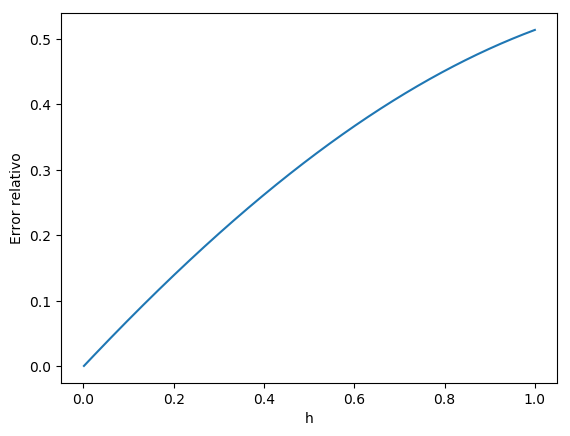

El ejercicio 3 esta en el archivo de tarea9 escrito

Ejercicio 4.

Implementa la derivada simétrica en Julia como derivada_Simetrica y repite la comparativa que realizaste en el ejercicio 2.

In [11]:
function derivada_Simetrica(f,x,h)
    Simetrica=((f(x+h)-f(x-h))/2h) 
    return Simetrica
    end

derivada_Simetrica (generic function with 1 method)

In [23]:
derivada_Simetrica(f,0.9,0.001)

-0.7833267790730014

In [26]:
function grafica_convergencia_simetrica(f,x,h)
    list3 = collect(h)
    listaderivada_simetrica = []
    r = 0.0 
    for i in 1:length(list3)
        r = listaderivada_simetrica(f,x,list3[i])
        push!(listaderivada_simetrica,r)
    end
    xlabel("h")
    title("Convergencia al valor exacto de la derivada")
    plot(h,listaderivada_simetrica, label= "Derivada simetrica")
    plot(h,fill(-0.19866933079506122,length(list3)),label= "Valor exacto de la derivada")
    show()
    legend()
end

grafica_convergencia_simetrica (generic function with 1 method)

In [25]:
function errorRelativo_S(f,x,h,der_real)
    error = abs((derivada_Simetrica(f,x,h)-der_real)/der_real)  #Aqui se hace el procedimiento para obtener el error.
    return error
end

errorRelativo_S (generic function with 1 method)

In [27]:
function grafica_error_relativo_simetrica(f,x,h,der_real)
    lista_h = collect(h)
    lista_error = []
    O = 0.0 
    for i in 1:length(lista_h)
        O = error_relativo_simetrica(f,x,lista_h[i],der_real)
        push!(lista_error,O)
    end
    title("Error absoluto relativo de la derivada en función de h")
    xlabel("h")
    plot(lista_h,lista_error, label = "Error")
    legend()
    show()
end

grafica_error_relativo_simetrica (generic function with 1 method)

In [ ]:
grafica_convergencia_simetrica(f,.2,linspace(0,1,100))            #Para que nos de la grafica.
grafica_error_relativo_simetrica(f,.2,linspace(0,1,100),-0.19866933079506122)

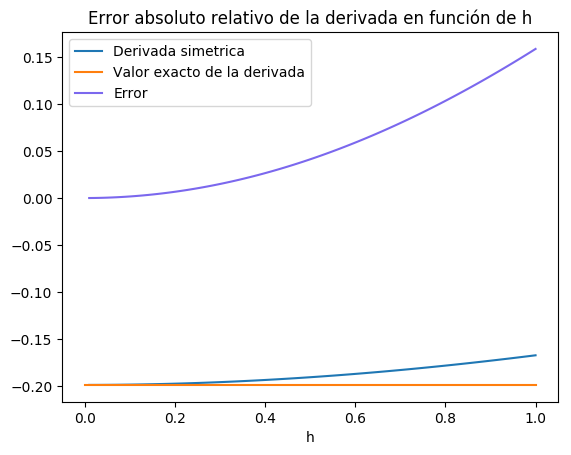

Analizando la gráfica anterior se aprecia que la diferencia de la aproximacion derivada_numerica, conforme h es más pequeña el error decae más rapido en el metodo derivada_simetrica.

Por otro lado la convergencia de la derivada vemos que esta tambien converge muchisimo más rápido que la del ejercicio 2 de este notebook.